<a href="https://colab.research.google.com/github/toukeer123/Personal-Loan-Prediction-Using-Random-Forest-Algorithm/blob/master/Copy_of_Copy_of_Copy_of_Welcome_To_Colaboratory.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importing necessary libraries and Loding the dataset**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from matplotlib.colors import ListedColormap
%matplotlib inline
data = pd.read_excel('/content/Bank_Personal_Loan_Modelling.xlsx','Data')
df = pd.DataFrame(data)
df.head()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [2]:
df.shape #checking the shape of the dataset that is number of rows and columns

(5000, 14)

In [3]:
df.drop(df.columns[[0,4]],axis=1,inplace= True)#dropping ID and ZipCode from the dataset

In [4]:
df.info() #Checking the datatypes of the variables and non-null type of data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 5000 non-null   int64  
 1   Experience          5000 non-null   int64  
 2   Income              5000 non-null   int64  
 3   Family              5000 non-null   int64  
 4   CCAvg               5000 non-null   float64
 5   Education           5000 non-null   int64  
 6   Mortgage            5000 non-null   int64  
 7   Personal Loan       5000 non-null   int64  
 8   Securities Account  5000 non-null   int64  
 9   CD Account          5000 non-null   int64  
 10  Online              5000 non-null   int64  
 11  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 468.9 KB


In [5]:
df.isnull().sum() #checking the number of missing values

Age                   0
Experience            0
Income                0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [6]:
df.describe() #Checking the the count of data mean, std deviation, min, max, etc. 

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,45.338400,20.104600,73.774200,2.396400,1.937913,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,11.463166,11.467954,46.033729,1.147663,1.747666,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,23.000000,-3.000000,8.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,35.000000,10.000000,39.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,45.000000,20.000000,64.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,55.000000,30.000000,98.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,67.000000,43.000000,224.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [7]:
df.nunique() #checking nuber of uniques in the data

Age                    45
Experience             47
Income                162
Family                  4
CCAvg                 108
Education               3
Mortgage              347
Personal Loan           2
Securities Account      2
CD Account              2
Online                  2
CreditCard              2
dtype: int64

In [8]:
sum(df['Mortgage']==0) #verifying the number of zeros in the Mortgage

3462

In [9]:
sum(df['CCAvg']==0) #verifying the number of zeros in the CCAvg

106

In [10]:
df.select_dtypes(include=['object']).dtypes.sum() #checking for the Catagorical variables

0

**Univariate** **and Bivariate**

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f52beb94668>,
      dtype=object)

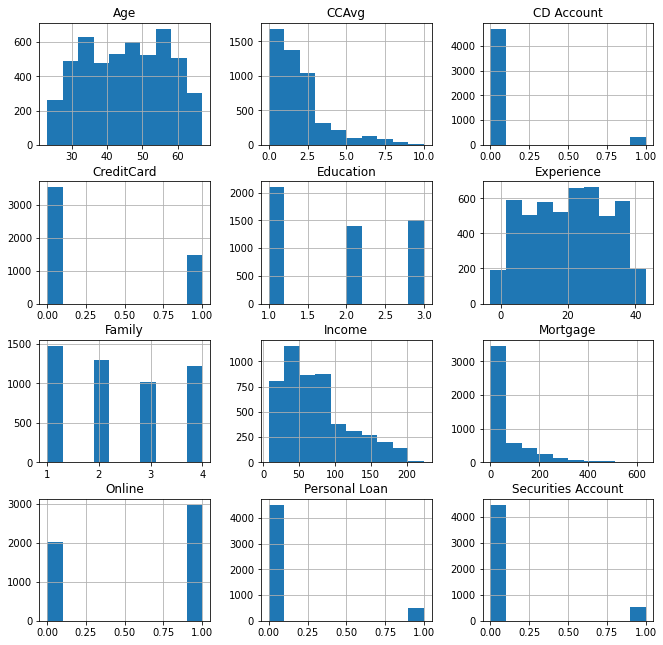

In [11]:
df[df.dtypes[(df.dtypes=="float64")|(df.dtypes=="int64")]
                        .index.values].hist(figsize=[11,11]) #Checking continuous variables in the dataset

# **Outlier Removal**

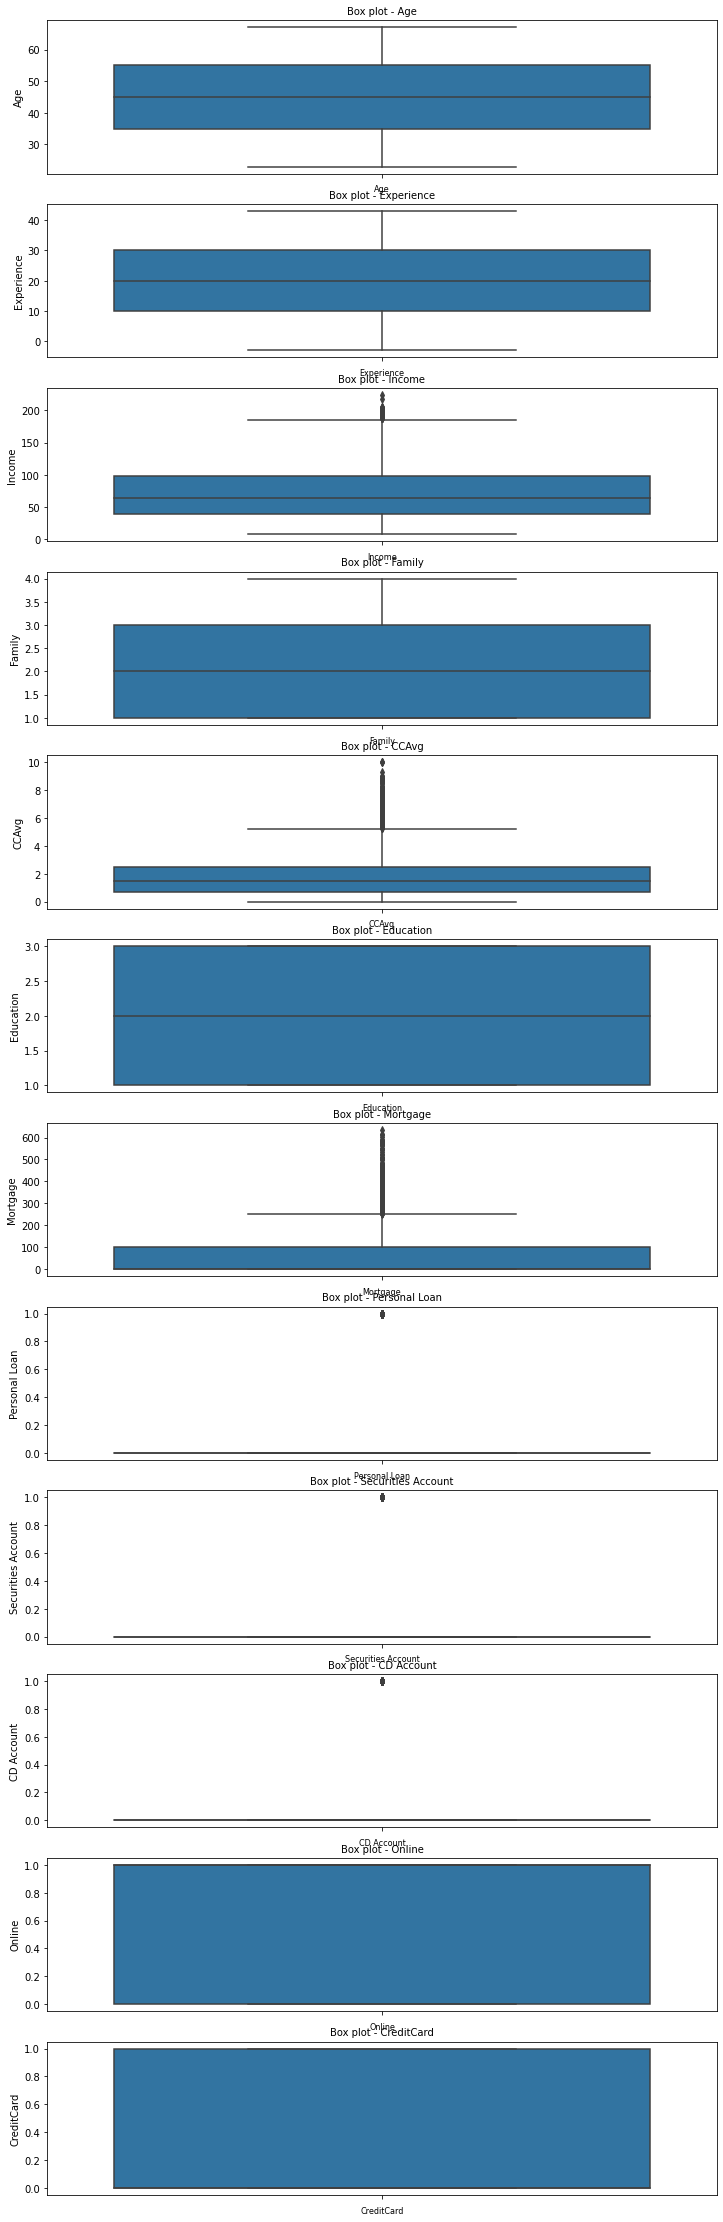

In [12]:
#Checking the outliers in the dataset
col_names = ['Age','Experience','Income','Family','CCAvg','Education','Mortgage','Personal Loan','Securities Account','CD Account','Online','CreditCard']
fig,ax = plt.subplots(len(col_names),figsize=(12,40))
for i, col_val in enumerate(col_names):

    sns.boxplot(y=df[col_val], ax=ax[i])
    ax[i].set_title('Box plot - {}'.format(col_val), fontsize=10)
    ax[i].set_xlabel(col_val, fontsize=8)

plt.show()

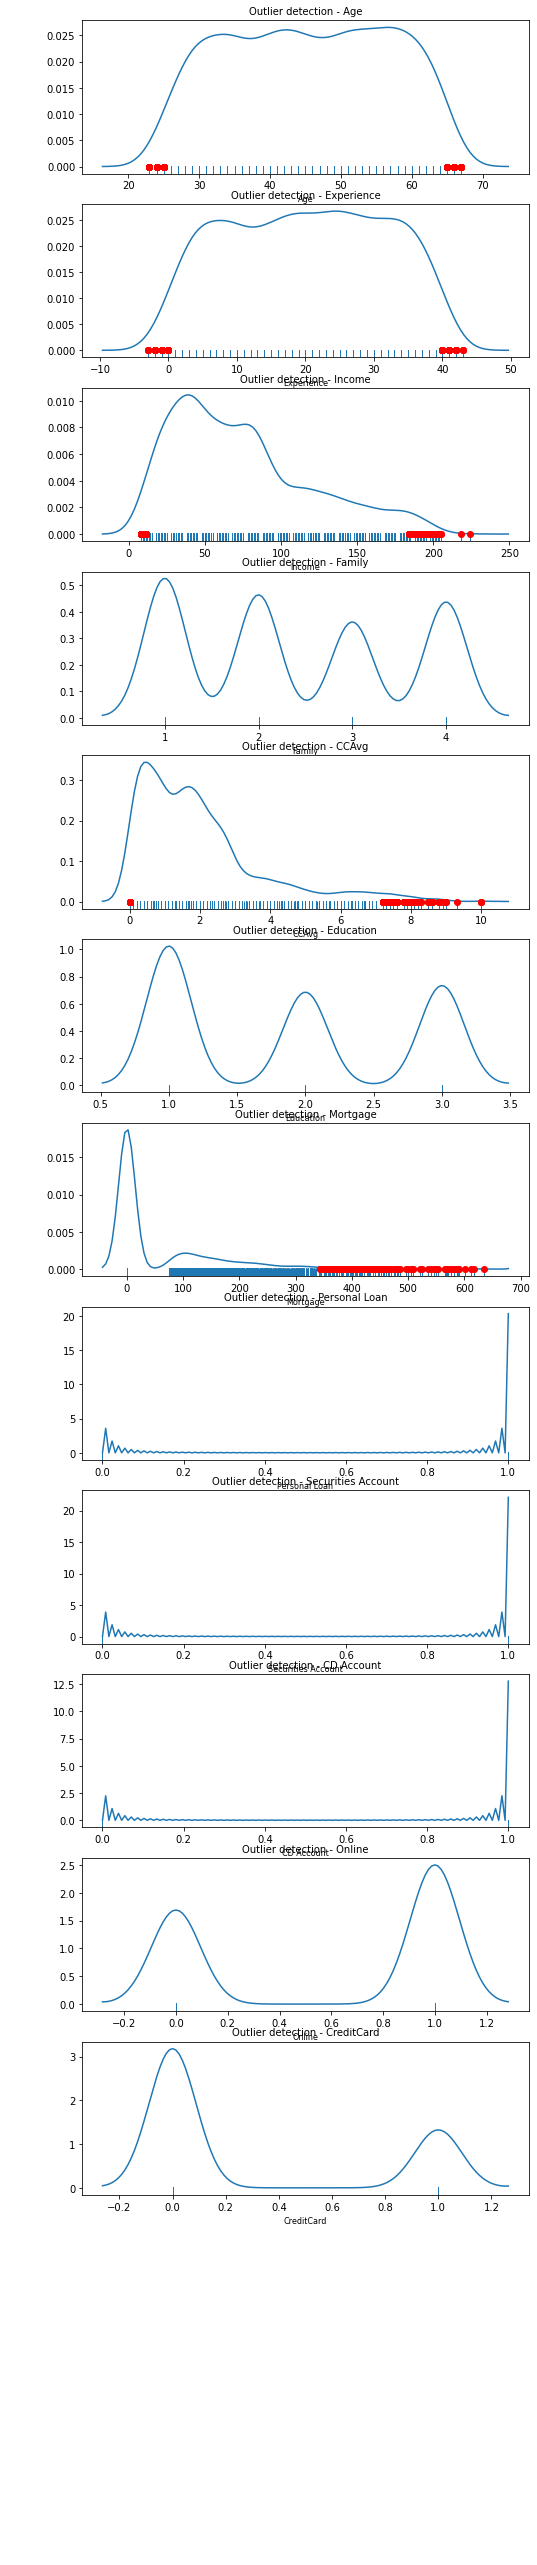

In [13]:
#Removing the Outliers in the dataset
def percentile_based_outlier(data, threshold=95):
  diff = (100-threshold)/2
  minval, maxval = np.percentile(data, [diff, 100 - diff])
  return (data < minval) | (data > maxval)
col_names = ['Age','Experience','Income','Family','CCAvg','Education','Mortgage','Personal Loan','Securities Account','CD Account','Online','CreditCard']
fig,ax = plt.subplots(len(col_names), figsize=(8,40))

for i, col_val in enumerate(col_names):
    x = df[col_val][:5000]
    sns.distplot(x, ax=ax[i], rug=True, hist=False)
    outliers = x[percentile_based_outlier(x)]
    ax[i].plot(outliers, np.zeros_like(outliers), 'ro', clip_on=False)

    ax[i].set_title('Outlier detection - {}'.format(col_val), fontsize=10)
    ax[i].set_xlabel(col_val, fontsize=8)

plt.show()
placing_y = df['Personal Loan']

# **Correlation between two variables**

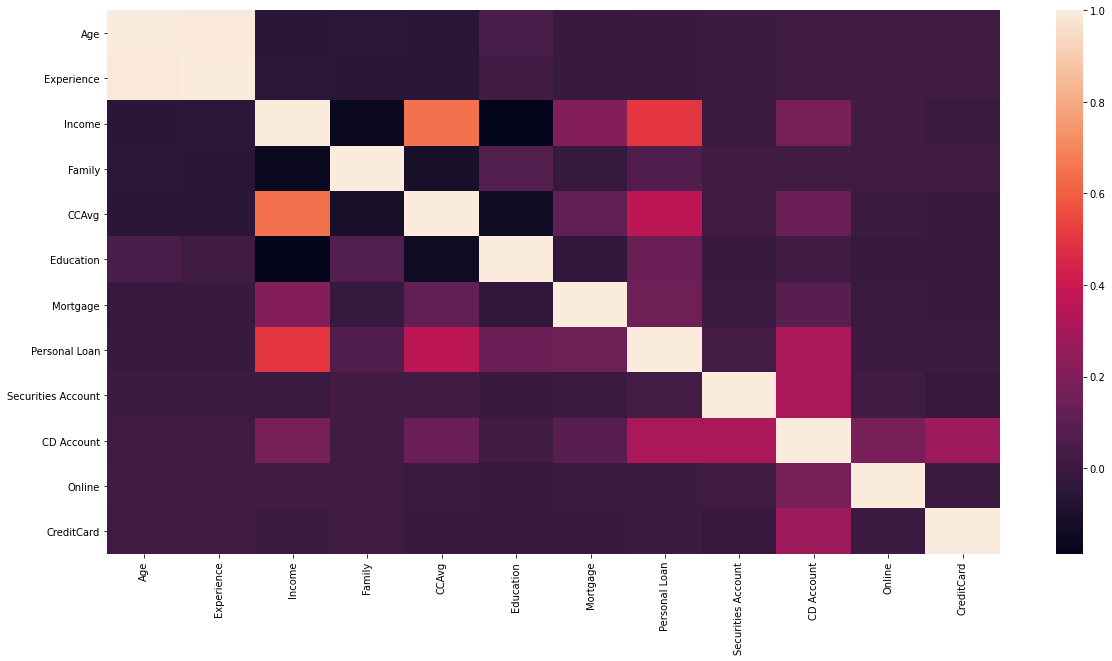

In [14]:
#Checking the correlation between two variables
fig,ax = plt.subplots(figsize=(20, 10))
corr = df.corr()
sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
x = df.iloc[:,[2,11]]

In [17]:
#Selecting the feature variables
X = df.iloc[:,[2,5,4]]
X.head()

,Income,Education,CCAvg
0,49,1,1.6
1,34,1,1.5
2,11,1,1.0
3,100,2,2.7
4,45,2,1.0


In [18]:
#selecting Personal loan as output variable
Y = placing_y
Y.head()

0    0
1    0
2    0
3    0
4    0
Name: Personal Loan, dtype: int64

In [19]:
#Splitting the X,Y data into Train and test set
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size = 0.30,random_state=0)
x_train.head()
y_train.head()
#Scaling or Normalizing the Train and Test set
sc_x = StandardScaler()
x_train = sc_x.fit_transform(x_train)  
x_test = sc_x.transform(x_test)

print(x_train)

[[ 1.8151347  -1.04711112  3.33396594]
 [ 0.6042706   0.14978271  0.59229145]
 [-0.67146121  1.34667655 -0.20736361]
 ...
 [-1.08229009  1.34667655 -0.60719114]
 [-0.54172577 -1.04711112 -0.26448183]
 [-0.77957407  1.34667655  0.07822748]]


# **Random Forest**

In [20]:
#Applying the Random Forest model to the train and test set
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import plot_tree

regressor = RandomForestRegressor(n_estimators=12, random_state=0)
regressor.fit(x_train, y_train)
pred = regressor.predict(x_test)
y_train_pred = regressor.predict(x_train)

print(pred)
x_train.shape

[0. 0. 0. ... 0. 0. 0.]


(3500, 3)

In [21]:
#Printing the Classification Report, Confusion_Matrix, Train and Test Accuracy_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test.round(),pred.round()))
print('Train Accuracy: '+str(accuracy_score(y_train,y_train_pred.round())*100)+'%')
print(classification_report(y_test,pred.round()))
print('Test Accuracy: '+str(accuracy_score(y_test, pred.round())*100)+'%')
y_test.shape

[[1360   12]
 [  30   98]]
Train Accuracy: 99.57142857142857%
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1372
           1       0.89      0.77      0.82       128

    accuracy                           0.97      1500
   macro avg       0.93      0.88      0.90      1500
weighted avg       0.97      0.97      0.97      1500

Test Accuracy: 97.2%


(1500,)

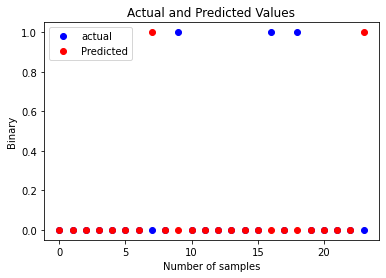

In [22]:
#Visualizing the data for first 25 samples of actual and predicted values
plt.plot(Y[0:24],'bo',label = 'actual')
plt.plot(pred[0:24].round(), 'ro', label = 'Predicted')
plt.legend()
plt.xlabel('Number of samples'); plt.ylabel('Binary'); plt.title('Actual and Predicted Values');